In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')
%matplotlib inline

In [2]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

## Import Data 

In [3]:
train = pd.read_csv('train_new.csv')
test = pd.read_csv('test_new.csv')

In [4]:
y = train.SalePrice
train = train.drop(columns=['Id', 'SalePrice'])

In [5]:
print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')

Train shape: (1451, 341)
Test shape: (1459, 341)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.30, random_state=0)
print(f'X_train : {X_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_train : {y_train.shape}')
print(f'y_test : {y_test.shape}')

X_train : (1015, 341)
X_test : (436, 341)
y_train : (1015,)
y_test : (436,)


In [7]:
stdSc = StandardScaler()
X_train = pd.DataFrame(stdSc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(stdSc.transform(X_test), columns=X_test.columns, index=X_test.index)

In [8]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)

def rmse_train(model):
    r = np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(r)
    
def rmse_test(model):
    r = np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(r)

## Support Vector Regression
1. rbf, linear
2. C and epsilon
3. poly, 1,2,3,4,5

In [16]:
kernel = ['rbf', 'linear']
param_grids = dict(kernel=kernel)
model = SVR(max_iter=100000)

gridSearch = GridSearchCV(model, param_grids, scoring=scorer, cv=10)

/Users/wongxingyik/Desktop/Kaggle_house_price/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/wongxingyik/Desktop/Kaggle_house_price/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/wongxingyik/Desktop/Kaggle_house_price/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/wongxingyik/Desktop/Kaggle_house_price/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solv

Best: -0.019825 using {'kernel': 'linear'}
-0.028127 (0.007808) with: {'kernel': 'rbf'}
-0.019825 (0.003803) with: {'kernel': 'linear'}


/Users/wongxingyik/Desktop/Kaggle_house_price/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


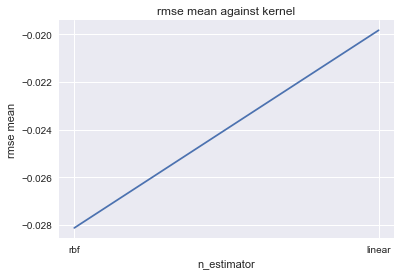

In [17]:
gridResult = gridSearch.fit(X_train, y_train)

print("Best: %f using %s" % (gridResult.best_score_, gridResult.best_params_))

means = gridResult.cv_results_['mean_test_score']
stds = gridResult.cv_results_['std_test_score']
params = gridResult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

plt.plot(kernel, means)
plt.title('rmse mean against kernel')
plt.xlabel('n_estimator')
plt.ylabel('rmse mean')
plt.show()

## C

In [20]:
C = [0.001,0.003,0.01,0.03,0.1,0.3,1,3]
param_grids = dict(C=C)
model = SVR(kernel='linear',max_iter=500000)

gridSearch = GridSearchCV(model, param_grids, scoring=scorer, cv=10)

/Users/wongxingyik/Desktop/Kaggle_house_price/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/wongxingyik/Desktop/Kaggle_house_price/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/wongxingyik/Desktop/Kaggle_house_price/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/wongxingyik/Desktop/Kaggle_house_price/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solv

/Users/wongxingyik/Desktop/Kaggle_house_price/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/wongxingyik/Desktop/Kaggle_house_price/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/wongxingyik/Desktop/Kaggle_house_price/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Best: -0.013004 using {'C': 0.001}
-0.013004 (0.003412) with: {'C': 0.001}
-0.013817 (0.003609) with: {'C': 0.003}
-0.014797 (0.003809) with: {'C': 0.01}
-0.015280 (0.004009) with: {'C': 0.03}
-0.015771 (0.004140) with: {'C': 0.1}
-0.017728 (0.003334) with: {'C': 0.3}
-0.021554 (0.005656) with: {'C': 1}
-0.024180 (0.005007) with: {'C': 3}


/Users/wongxingyik/Desktop/Kaggle_house_price/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


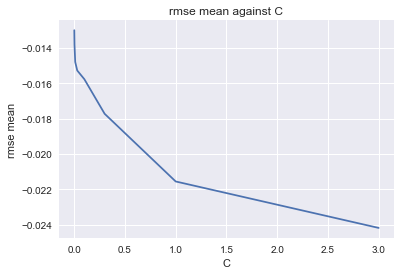

In [21]:
gridResult = gridSearch.fit(X_train, y_train)

print("Best: %f using %s" % (gridResult.best_score_, gridResult.best_params_))

means = gridResult.cv_results_['mean_test_score']
stds = gridResult.cv_results_['std_test_score']
params = gridResult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

plt.plot(C, means)
plt.title('rmse mean against C')
plt.xlabel('C')
plt.ylabel('rmse mean')
plt.show()

## Epsilon

In [22]:
epsilon = [0.001,0.003,0.01,0.03,0.1,0.3,1,3]
param_grids = dict(epsilon=epsilon)
model = SVR(kernel='linear', C=0.001, max_iter=100000)

gridSearch = GridSearchCV(model, param_grids, scoring=scorer, cv=10)

Best: -0.012438 using {'epsilon': 0.03}
-0.013022 (0.003206) with: {'epsilon': 0.001}
-0.012919 (0.003261) with: {'epsilon': 0.003}
-0.012721 (0.003455) with: {'epsilon': 0.01}
-0.012438 (0.003538) with: {'epsilon': 0.03}
-0.013004 (0.003412) with: {'epsilon': 0.1}
-0.020087 (0.003680) with: {'epsilon': 0.3}
-0.108505 (0.018404) with: {'epsilon': 1}
-0.154512 (0.022555) with: {'epsilon': 3}


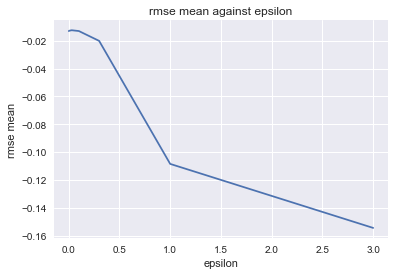

In [23]:
gridResult = gridSearch.fit(X_train, y_train)

print("Best: %f using %s" % (gridResult.best_score_, gridResult.best_params_))

means = gridResult.cv_results_['mean_test_score']
stds = gridResult.cv_results_['std_test_score']
params = gridResult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

plt.plot(epsilon, means)
plt.title('rmse mean against epsilon')
plt.xlabel('epsilon')
plt.ylabel('rmse mean')
plt.show()

## Poly kernel

In [34]:
degree = [1,2,3,4,5]
param_grids = dict(degree=degree)
model = SVR(kernel='poly', max_iter=100000)

gridSearch = GridSearchCV(model, param_grids, scoring=scorer, cv=10)

Best: -0.013826 using {'degree': 1}
-0.013826 (0.003616) with: {'degree': 1}
-0.044473 (0.009691) with: {'degree': 2}
-0.031092 (0.010400) with: {'degree': 3}
-0.066906 (0.026238) with: {'degree': 4}
-0.124851 (0.133209) with: {'degree': 5}


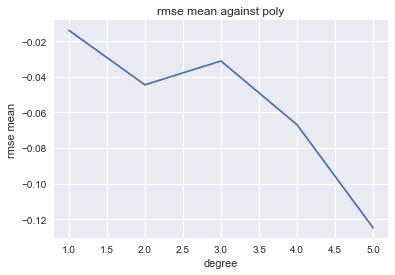

In [35]:
gridResult = gridSearch.fit(X_train, y_train)

print("Best: %f using %s" % (gridResult.best_score_, gridResult.best_params_))

means = gridResult.cv_results_['mean_test_score']
stds = gridResult.cv_results_['std_test_score']
params = gridResult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

plt.plot(degree, means)
plt.title('rmse mean against poly')
plt.xlabel('degree')
plt.ylabel('rmse mean')
plt.show()

## Poly coeff0

In [40]:
coef0 = [0,0.01,0.03,0.1,0.3,1,3,10]
param_grids = dict(coef0=coef0)
model = SVR(kernel='poly', degree=1, max_iter=100000)

gridSearch = GridSearchCV(model, param_grids, scoring=scorer, cv=10)

Best: -0.013824 using {'coef0': 3}
-0.013826 (0.003616) with: {'coef0': 0}
-0.013825 (0.003615) with: {'coef0': 0.01}
-0.013827 (0.003614) with: {'coef0': 0.03}
-0.013825 (0.003613) with: {'coef0': 0.1}
-0.013826 (0.003614) with: {'coef0': 0.3}
-0.013827 (0.003614) with: {'coef0': 1}
-0.013824 (0.003614) with: {'coef0': 3}
-0.013825 (0.003606) with: {'coef0': 10}


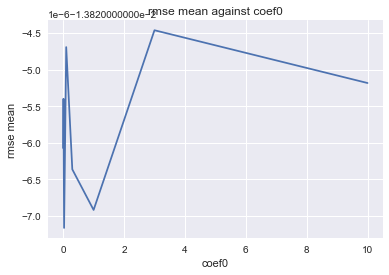

In [41]:
gridResult = gridSearch.fit(X_train, y_train)

print("Best: %f using %s" % (gridResult.best_score_, gridResult.best_params_))

means = gridResult.cv_results_['mean_test_score']
stds = gridResult.cv_results_['std_test_score']
params = gridResult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

plt.plot(coef0, means)
plt.title('rmse mean against coef0')
plt.xlabel('coef0')
plt.ylabel('rmse mean')
plt.show()

## C

In [42]:
C = [0.001,0.003,0.01,0.03,0.1,0.3,1,3]
param_grids = dict(C=C)
model = SVR(kernel='poly', degree=1, coef0=3, max_iter=100000)

gridSearch = GridSearchCV(model, param_grids, scoring=scorer, cv=10)

Best: -0.012667 using {'C': 0.1}
-0.093186 (0.014439) with: {'C': 0.001}
-0.043221 (0.008204) with: {'C': 0.003}
-0.018129 (0.004316) with: {'C': 0.01}
-0.013508 (0.003387) with: {'C': 0.03}
-0.012667 (0.003301) with: {'C': 0.1}
-0.012952 (0.003381) with: {'C': 0.3}
-0.013824 (0.003614) with: {'C': 1}
-0.014726 (0.003802) with: {'C': 3}


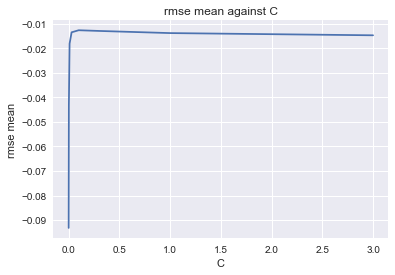

In [43]:
gridResult = gridSearch.fit(X_train, y_train)

print("Best: %f using %s" % (gridResult.best_score_, gridResult.best_params_))

means = gridResult.cv_results_['mean_test_score']
stds = gridResult.cv_results_['std_test_score']
params = gridResult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

plt.plot(C, means)
plt.title('rmse mean against C')
plt.xlabel('C')
plt.ylabel('rmse mean')
plt.show()

## Epsilon

In [46]:
epsilon = [0.001,0.003,0.01,0.03,0.1,0.3,1,3]
param_grids = dict(epsilon=epsilon)
model = SVR(kernel='poly', degree=1, C=0.1, coef0=3, max_iter=100000)

gridSearch = GridSearchCV(model, param_grids, scoring=scorer, cv=10)

Best: -0.012044 using {'epsilon': 0.03}
-0.012058 (0.003166) with: {'epsilon': 0.001}
-0.012046 (0.003158) with: {'epsilon': 0.003}
-0.012045 (0.003175) with: {'epsilon': 0.01}
-0.012044 (0.003163) with: {'epsilon': 0.03}
-0.012667 (0.003301) with: {'epsilon': 0.1}
-0.020193 (0.004004) with: {'epsilon': 0.3}
-0.108549 (0.018398) with: {'epsilon': 1}
-0.154512 (0.022555) with: {'epsilon': 3}


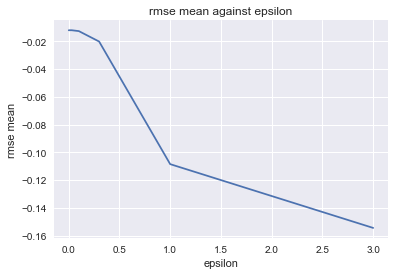

In [47]:
gridResult = gridSearch.fit(X_train, y_train)

print("Best: %f using %s" % (gridResult.best_score_, gridResult.best_params_))

means = gridResult.cv_results_['mean_test_score']
stds = gridResult.cv_results_['std_test_score']
params = gridResult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

plt.plot(epsilon, means)
plt.title('rmse mean against epsilon')
plt.xlabel('epsilon')
plt.ylabel('rmse mean')
plt.show()

# Final



In [50]:
model = SVR(kernel='poly', degree=1, C=0.1, coef0=3, max_iter=100000)

In [51]:
model.fit(X_train, y_train)

SVR(C=0.1, coef0=3, degree=1, kernel='poly', max_iter=100000)

In [52]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

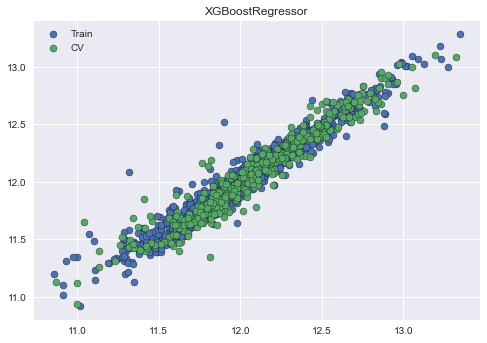

In [53]:
plt.style.use('seaborn')
plt.scatter(y_train, train_pred, label='Train', edgecolors='black')
plt.scatter(y_test, test_pred, label='CV', edgecolors='black')
plt.legend(loc=0)
plt.title('XGBoostRegressor')
plt.show()

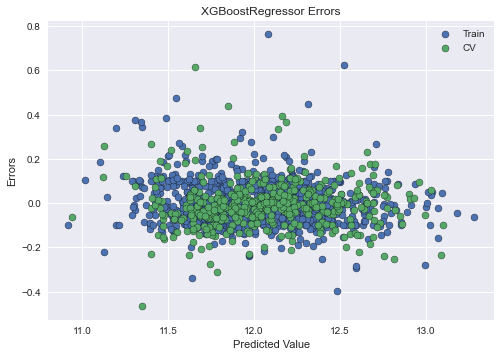

In [54]:
plt.scatter(train_pred, train_pred - y_train , label='Train', edgecolors='black')
plt.scatter(test_pred, test_pred - y_test, label='CV', edgecolors='black')
plt.legend(loc=0)
plt.title('XGBoostRegressor Errors')
plt.xlabel('Predicted Value')
plt.ylabel('Errors')
plt.show()

In [55]:
# xgb_preds = np.expm1(model_xgb.predict(X_test))

## Submission

In [56]:
test = pd.read_csv('test_new.csv')
test = pd.DataFrame(stdSc.transform(test), columns=test.columns, index=test.index)
prediction = model.predict(test)
prediction

array([11.67304063, 12.00278167, 12.08409963, ..., 11.98195107,
       11.64898482, 12.33721732])

In [57]:
prediction = np.expm1(prediction)
submission = pd.DataFrame(prediction, columns=['SalePrice'], index=pd.read_csv('test.csv').Id)
submission.head()

,SalePrice
Id,
1461,117363.603044
1462,163207.151805
1463,177033.451183
1464,192181.771091
1465,187940.809809


In [58]:
submission.to_csv('svr_poly_1.csv')